<a href="https://colab.research.google.com/github/Rafterbang/tkc_258-271/blob/main/BuildModelv2_258_271.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Data

[Errno 2] No such file or directory: '/content/drive/MyDrive/Data'
/content


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
from PIL import Image
import os
import random
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from tensorflow.keras.metrics import PrecisionAtRecall,Recall

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [12]:
test_path = '/content/drive/MyDrive/Colab Notebooks/S7/TKC/Data/test'
train_path = '/content/drive/MyDrive/Colab Notebooks/S7/TKC/Data/train'

classes = ["COVID19", "NORMAL"]
num_classes = len(classes)
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True, validation_split=0.001)

test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.8)

train_gen = train_datagen.flow_from_directory(directory=train_path,
                                             target_size=(299, 299),
                                             class_mode='binary',
                                             subset='training',
                                             shuffle=True, 
                                             classes=classes,
                                             batch_size=batch_size,
                                             )

test_gen = test_datagen.flow_from_directory(directory=test_path,
                                             target_size=(299, 299),
                                             class_mode='binary',
                                             subset='validation',
                                             shuffle=False, 
                                             classes=classes,
                                             batch_size=batch_size,
                                             )

Found 1725 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='Same', input_shape=(299, 299, 3)))
model.add(BatchNormalization())

################

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#################

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#################

model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Output 
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 299, 299, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 299, 299, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 299, 299, 64)      18496     
                                                                 
 batch_normalization_10 (Bat  (None, 299, 299, 64)     256       
 chNormalization)                                                
                                                                 
 average_pooling2d_4 (Averag  (None, 149, 149, 64)     0         
 ePooling2D)                                                     
                                                      

In [15]:
opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
from tensorflow import keras

#keras.utils.plot_model(model)

In [17]:
epochs=20

#callback

history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen) // batch_size,
                    validation_steps=len(test_gen) // batch_size,
                    validation_data=test_gen, 
                    epochs=epochs,
                    verbose = 1)

Epoch 1/20
6/6 [==============================] - 44s 6s/step - loss: 0.5146 - acc: 0.7708 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 0.7039 - acc: 0.8021 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.4752 - acc: 0.8333 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 4/20
6/6 [==============================] - 15s 3s/step - loss: 0.1940 - acc: 0.9479 - val_loss: 7.9104e-04 - val_acc: 1.0000
Epoch 5/20
6/6 [==============================] - 15s 2s/step - loss: 0.3478 - acc: 0.8854 - val_loss: 8.4311e-04 - val_acc: 1.0000
Epoch 6/20
6/6 [==============================] - 13s 2s/step - loss: 0.2093 - acc: 0.9271 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 7/20
6/6 [==============================] - 12s 2s/step - loss: 0.3505 - acc: 0.8750 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 8/20
6/6 [==============================] - 15s 2s/step - loss: 0.2341 - acc: 0.9271 - val

In [18]:
y_pred = model.predict(test_gen)

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

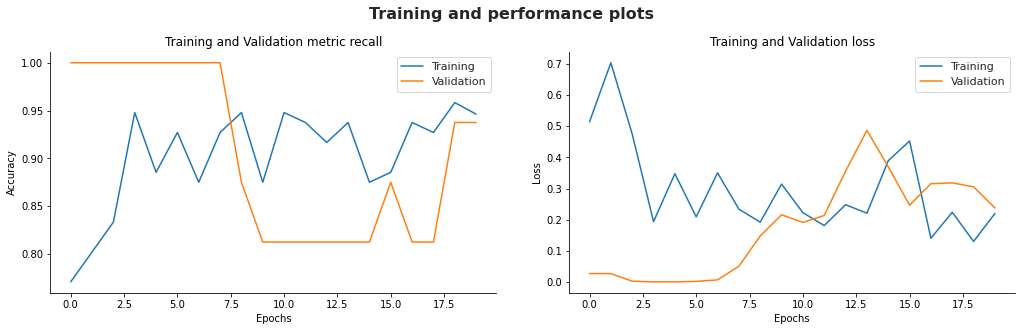

In [20]:
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['acc'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_acc'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Training and Validation metric recall')
axarr[1].set_title('Training and Validation loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and performance plots', fontsize=16, weight='bold');
fig.tight_layout(pad=3.0)
plt.show()

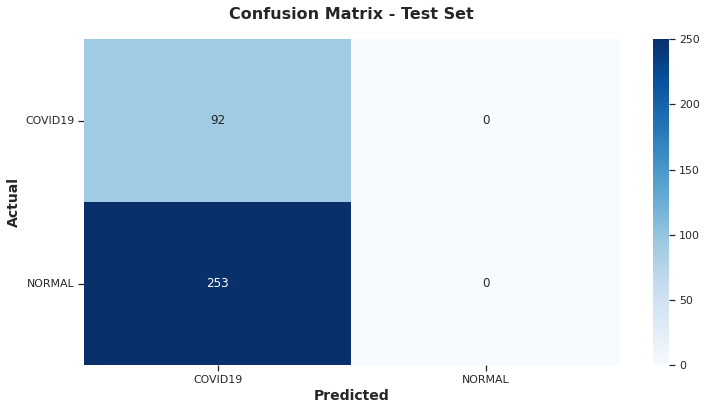

In [21]:
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_gen.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [22]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        92
           1       0.00      0.00      0.00       253

    accuracy                           0.27       345
   macro avg       0.13      0.50      0.21       345
weighted avg       0.07      0.27      0.11       345



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


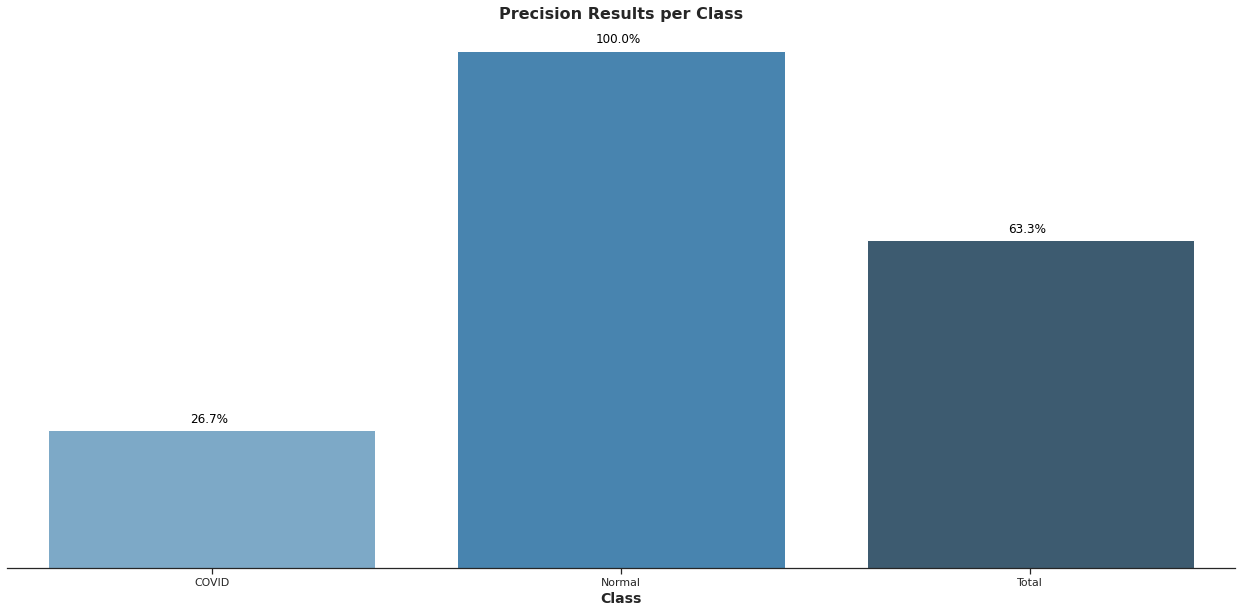

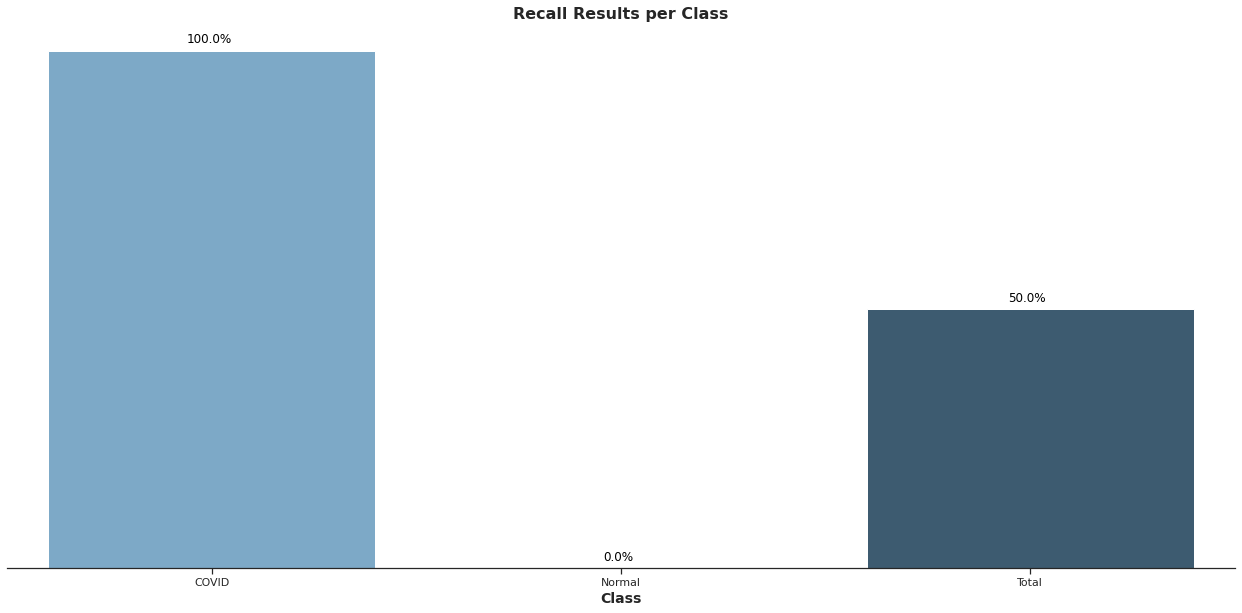

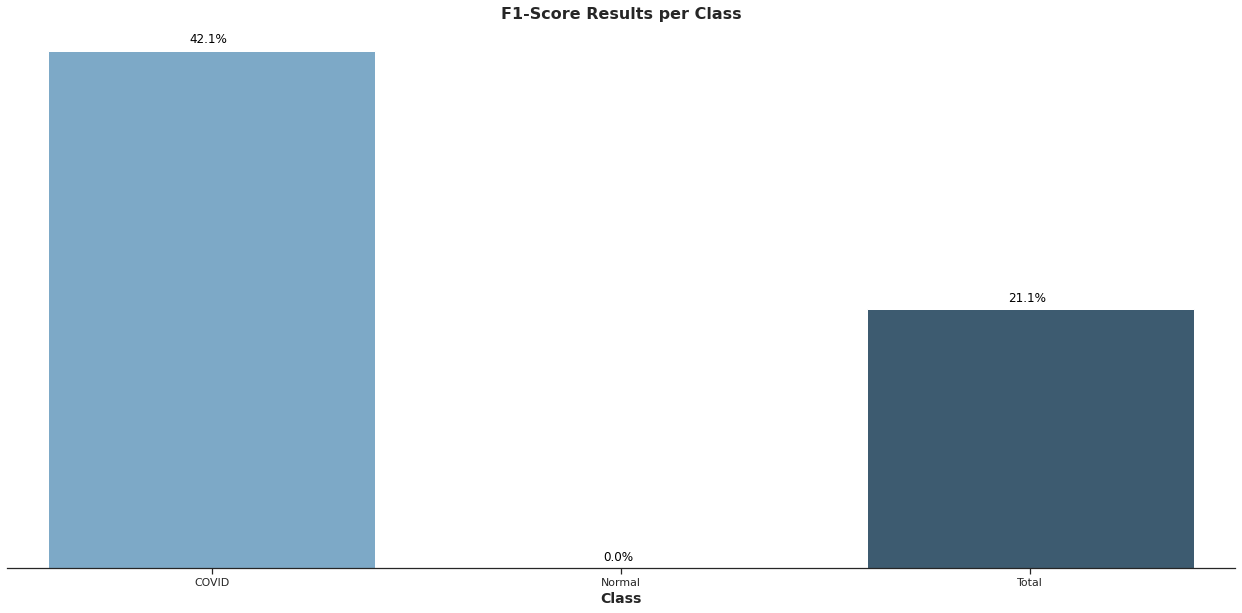

In [24]:
acc = accuracy_score(y_true, predictions)

results_all = precision_recall_fscore_support(y_true, predictions, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_true, predictions, average=None, zero_division=1)

metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = ['COVID','Normal','Total']

def metrics_plot(df,metric):
    plt.figure(figsize=(22,10))
    ax = sns.barplot(data =df, x=df.index, y = metric,palette = "Blues_d")
    #Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14,weight = 'bold')
    ax.set_ylabel(metric,fontsize = 14,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(metric+ ' Results per Class', fontsize = 16,weight = 'bold');

metrics_plot(all_df, 'Precision')#Results by Class
metrics_plot(all_df, 'Recall')#Results by Class
metrics_plot(all_df, 'F1-Score')#Results by Class


In [25]:
model.save('/content/drive/MyDrive/Colab Notebooks/S7/TKC/modelv2.h5')